In [1]:
import random
from scipy.stats import norm, binom, expon, wilcoxon, kstest, mannwhitneyu
from statsmodels.stats import weightstats as stests
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv('test1.csv') # данный файл
x = df[df['group'] == 'test']['target']
y = df[df['group'] == 'control']['target']

Далее мы хотели бы понять, из какого семейства распределений пришла наша метрика  
Для этого сначала нарисуем распределения наших данных в виде гистограмм

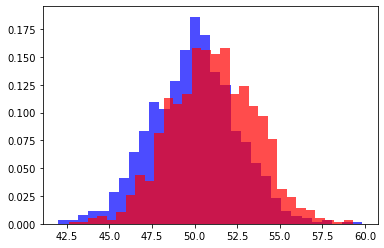

In [3]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Заметим, что распределение очень похоже на нормальное  
Тогда дополнительно проверим данные на нормальность с помощью теста Колмогорова-Смирнова  
Перед этим сдвинем наши данные на значение среднего и отнормируем на значение стандартного отклонения (так как kstest работает по умолчанию для стандартного нормального распределения)

In [4]:
kstest((x - x.mean()) / x.std(), "norm")

KstestResult(statistic=0.019688897489890667, pvalue=0.8209656898620732)

In [5]:
kstest((y - y.mean()) / y.std(), "norm")

KstestResult(statistic=0.014810944996272113, pvalue=0.979671010716616)

Значение p-value очень большое, так что отвергнуть нормальность мы не можем  
Поэтому будем использовать двухвыборочный Z-test    
Устанавливаем двусторонний тест, количество степеней свободы равное 1 и тестируемое значение равное 0, так как мы проверяем гипотезу о равенстве средних


In [6]:
res = stests.ztest(x, y, alternative='two-sided', value=0, ddof=1.0)
print("Z-statistic:", res[0])
print("P-value:", res[1])

Z-statistic: -9.878332719470977
P-value: 5.168568157700621e-23


Видим, что p-value очень маленький и уж точно меньше 0.05, поэтому мы отклоняем нулевую гипотезу о равенстве средних, а значит наши изменения статзначимы 